<a href="https://colab.research.google.com/github/rono516/WebScrapingWithPython/blob/master/AppleStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#predict stock of Apple using LSTM

In [21]:
import math
import pandas_datareader as web
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# yf.web_override()
#get the stock quote
from google.colab import files
files.upload()

Saving AAPL.csv to AAPL.csv


{'AAPL.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2018-01-02,42.540001,43.075001,42.314999,43.064999,41.188168,102223600\n2018-01-03,43.132500,43.637501,42.990002,43.057499,41.180988,118071600\n2018-01-04,43.134998,43.367500,43.020000,43.257500,41.372272,89738400\n2018-01-05,43.360001,43.842499,43.262501,43.750000,41.843319,94640000\n2018-01-08,43.587502,43.902500,43.482498,43.587502,41.687889,82271200\n2018-01-09,43.637501,43.764999,43.352501,43.582500,41.683109,86336000\n2018-01-10,43.290001,43.575001,43.250000,43.572498,41.673546,95839600\n2018-01-11,43.647499,43.872501,43.622501,43.820000,41.910263,74670800\n2018-01-12,44.044998,44.340000,43.912498,44.272499,42.343033,101672400\n2018-01-16,44.474998,44.847500,44.035000,44.047501,42.127842,118263600\n2018-01-17,44.037498,44.812500,43.767502,44.775002,42.823635,137547200\n2018-01-18,44.842499,45.025002,44.562500,44.814999,42.861893,124773600\n2018-01-19,44.652500,44.895000,44.352501,44.615002,42.670612,129700400\n2018-01-22,4

In [23]:
df = pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,41.188168,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,41.180988,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,41.372272,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.843319,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.687889,82271200
...,...,...,...,...,...,...,...
1003,2021-12-27,177.089996,180.419998,177.070007,180.330002,180.330002,74919600
1004,2021-12-28,180.160004,181.330002,178.529999,179.289993,179.289993,79144300
1005,2021-12-29,179.330002,180.630005,178.139999,179.380005,179.380005,62348900
1006,2021-12-30,179.470001,180.570007,178.089996,178.199997,178.199997,59773000


In [24]:
#get number of rows and columns in the dataset
df.shape

(1008, 7)

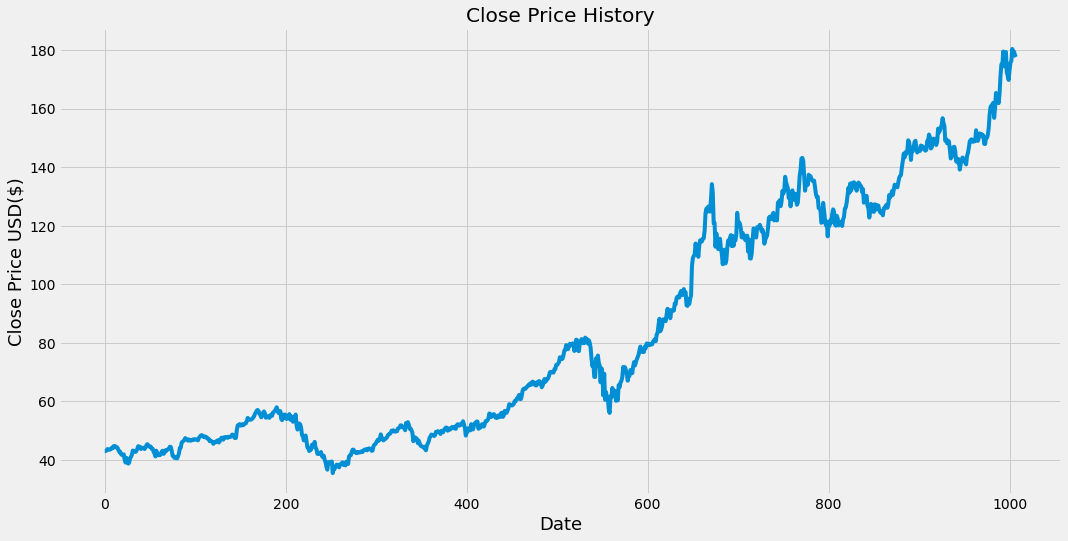

In [25]:
#visualize closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [54]:
#Create new dataframe with only the Close Column
data = df.filter('Close')
#Covert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train our LSTM model Choosing in the ratio 80% to 20%
trainning_data_len = math.ceil(len(dataset)*.8)



In [57]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

ValueError: ignored